#### 데이터 설명
모바일 어플리케이션 유저 500명의 월 방문 횟수(visit_per_month)와 사용 시간(use_time) 데이터.

In [1]:
import pandas as pd

user_activity = pd.read_csv('data/app_users.csv', index_col=0)
user_activity.head()

,visit_per_month,use_time
0,14,22.8
1,32,13.6
2,8,3.1
3,13,5.7
4,19,20.8


산점도 그래프 그리기

C:\Users\emma1\AppData\Local\Temp\ipykernel_3620\3972589564.py:7: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')


<Axes: xlabel='visit_per_month', ylabel='use_time'>

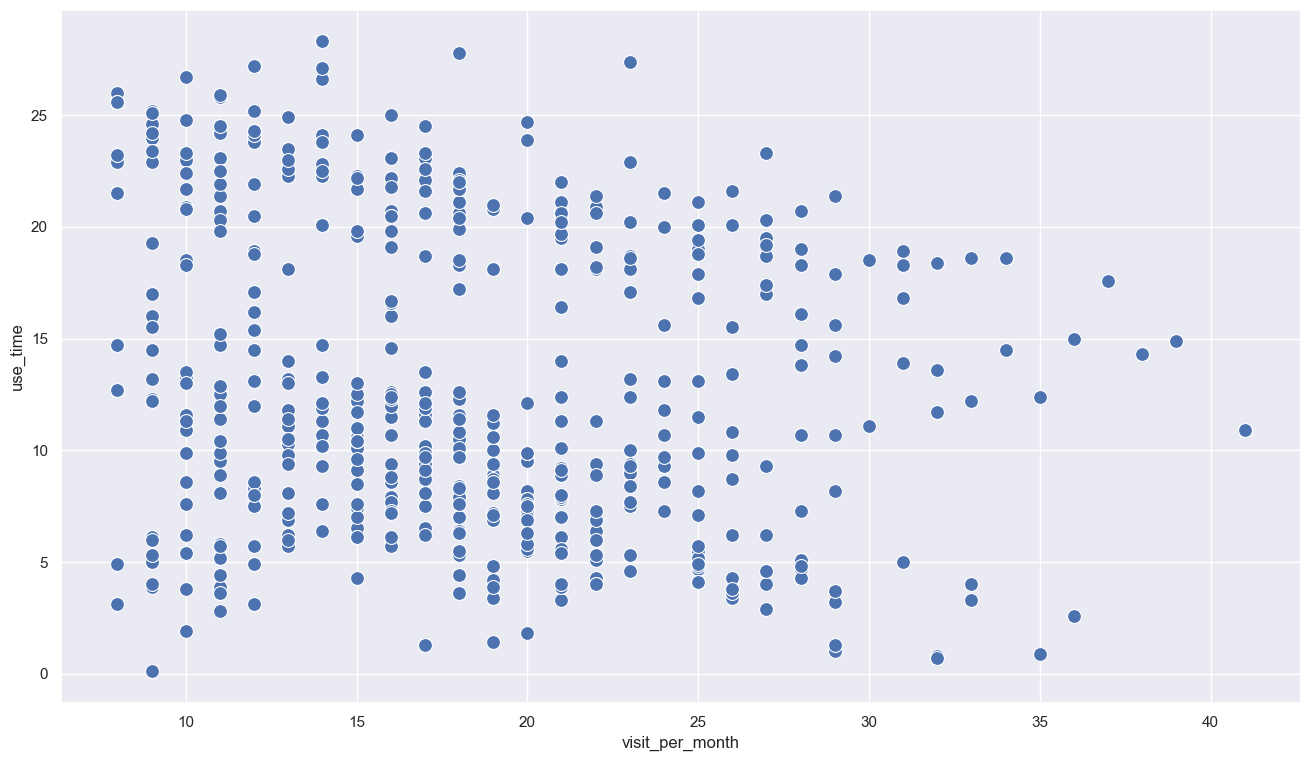

In [2]:
import seaborn as sns

sns.set(style='darkgrid',
        rc={'figure.figsize':(16,9)})

# 시각화
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, s=100, palette='bright')

- 데이터가 넓고 고르게 분포해 있어, 단순 시각화로는 많은 정보를 얻기 힘듦.
- 클러스터링으로 해결.

클러스터링

In [3]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=123)
model.fit(user_activity)

# 클러스터 구분
user_activity['label'] = model.predict(user_activity)

# 클러스터별 속한 유저 수
user_activity.groupby('label').count()

c:\Users\emma1\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,visit_per_month,use_time
label,,
0,229,229
1,121,121
2,150,150


<Axes: xlabel='visit_per_month', ylabel='use_time'>

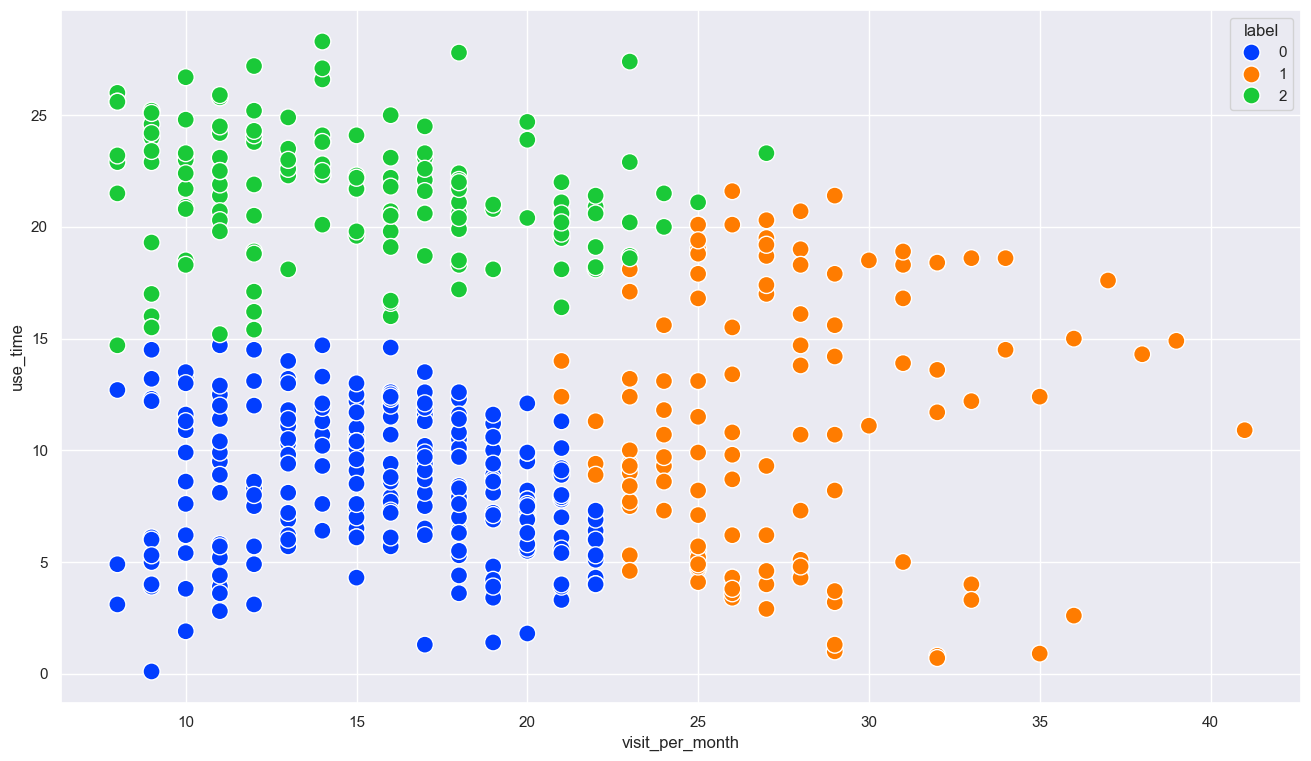

In [4]:
# 구분된 데이터를 산점도에 다른 색으로 표시
sns.scatterplot(x='visit_per_month', y='use_time', data=user_activity, hue=user_activity['label'], s=150, palette='bright')

- 클러스터 0 : 방문 횟수와 사용 시간이 둘 다 적음. 다수의 유저가 앱을 많이 사용하고 있지 않다는 뜻.  
    -> 해당 클러스터의 유저들이 앱에 좀 더 자주 방문하거나, 사용시간을 늘리도록 대안 필요.